In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv(r"titanic\full.csv")

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

survived is float but it should be either 1 or 0, so it can be change to int64
we have name and age and also name_wiki and age_wiki, so we can think of dropping one pair, most likely name and age since it has less data


In [148]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

# Since the total entrees are 1309 but cabin and body have null values of 1014 and 1179 resp. I will drop those columns and survived are 418 NaN, so i might set them to 0 as most of the people on titanic were dead.

In [149]:
df = df.drop(columns=['Cabin', 'Body', 'Name_wiki', 'Age', 'Class', 'Name', 'WikiId', 'Boarded', 'Destination', 'Hometown', 'Ticket', 'PassengerId'])

In [150]:
df['Survived'].fillna(0.0, inplace=True)

C:\Users\niran\AppData\Local\Temp\ipykernel_22788\1705122917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Survived'].fillna(0.0, inplace=True)


In [151]:
df['Lifeboat'] = df['Lifeboat'].replace({'?': np.nan, '14?': '14', '15?': '15', '': np.nan, 'A[64]': 'A', 'A': '17', 'B': '18', 'C': '19', 'D': '20'})


In [152]:
df['Lifeboat'] = pd.to_numeric(df['Lifeboat'], errors='coerce')
#making all the values to float from string


In [153]:
import random

def set_lifeboat(row):
    if pd.isna(row['Lifeboat']) and row['Survived'] == 1.0 :
        return random.randint(1, 20)
    elif pd.isna(row['Lifeboat']) and row['Survived'] == 0.0:
        return 0.0
    return row['Lifeboat']

df['Lifeboat'] = df.apply(set_lifeboat, axis=1)
#setting lifeboat to random 1-20 if survived

In [154]:
df['Survived'] = df['Survived'].astype(int)
df['Lifeboat'] = df['Lifeboat'].astype(int)

In [155]:
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
#setting fare for nan to same fare from that class

In [156]:
df['Embarked']= df['Embarked'].fillna('S')
#setting nan with embark to S for southhampton


In [157]:
df['Age_wiki'] = df['Age_wiki'].fillna(df['Age_wiki'].mode()[0])
#setting nan with mode of age_wiki


In [158]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])


In [159]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_wiki,Lifeboat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.0,0,False,True,False,False,True
1,1,1,1,0,71.2833,35.0,4,True,False,True,False,False
2,1,3,0,0,7.9250,26.0,14,True,False,False,False,True
3,1,1,1,0,53.1000,35.0,20,True,False,False,False,True
4,0,3,0,0,8.0500,35.0,0,False,True,False,False,True


In [160]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age_wiki,Lifeboat
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.261268,2.294882,0.498854,0.385027,33.280206,29.376173,4.156608
std,0.439494,0.837836,1.041658,0.865560,51.741830,13.732751,6.228750
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.170000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,21.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,27.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,31.275000,37.000000,8.000000
max,1.000000,3.000000,8.000000,9.000000,512.329200,74.000000,20.000000


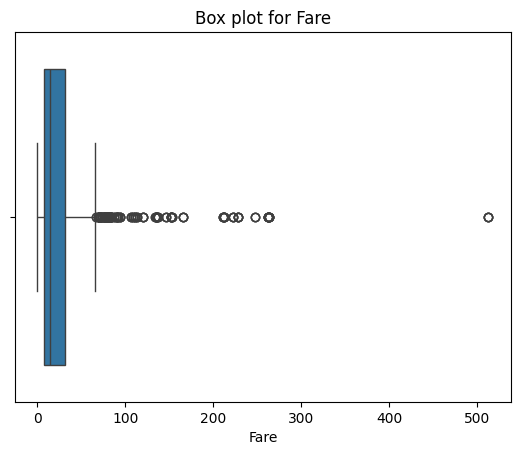

In [161]:
sns.boxplot(x = df['Fare'])
plt.title("Box plot for Fare")
plt.xlabel("Fare")
plt.show()

In [162]:
mean = df['Fare'].mean()
df['Fare'] = np.where(df['Fare'] > 200, 200, df['Fare'])

In [163]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age_wiki,Lifeboat
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.261268,2.294882,0.498854,0.385027,31.344304,29.376173,4.156608
std,0.439494,0.837836,1.041658,0.865560,40.984109,13.732751,6.228750
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.170000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,21.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,27.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,31.275000,37.000000,8.000000
max,1.000000,3.000000,8.000000,9.000000,200.000000,74.000000,20.000000


Taken care of null values, outliers, object colmns and encoded the ones that are possible.

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [166]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_wiki,Lifeboat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.594703,0.841916,0.481288,-0.445,-0.588118,-0.537328,-0.667581,False,True,False,False,True
1,1.681513,-1.546098,0.481288,-0.445,0.974872,0.409676,-0.025152,True,False,True,False,False
2,1.681513,0.841916,-0.479087,-0.445,-0.571642,-0.245942,1.580920,True,False,False,False,True
3,1.681513,-1.546098,0.481288,-0.445,0.531035,0.409676,2.544563,True,False,False,False,True
4,-0.594703,0.841916,-0.479087,-0.445,-0.568591,0.409676,-0.667581,False,True,False,False,True


In [169]:
df['Sex_female'].value_counts()

Sex_female
False    843
True     466
Name: count, dtype: int64

In [177]:
df['Sex_male'] = df['Sex_male'].astype(int)
df['Sex_female'] = df['Sex_female'].astype(int)
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)


Since the female is less than 40 percent, lets balance the dataset

In [182]:
from sklearn.utils import resample

majority_class = df[df['Sex_male'] == 1]  
minority_class = df[df['Sex_female'] == 1]  

minority_upsampled = resample(minority_class,
                               replace=True,    
                               n_samples=len(majority_class),  
                               random_state=42)  

df = pd.concat([majority_class, minority_upsampled])

In [183]:
print(df[['Sex_male', 'Sex_female']].sum())

Sex_male      843
Sex_female    843
dtype: int64
